### Problem:
    A laboratory uses five highly sophisticated sensors to continuously capture atmospheric data. The data is taken at 
    random interval over a long period of time automatically. There is an event recorder which records an atmospheric event 
    (basically a parameter) at random interval. There is a mathematical relationship between the data captured by the 
    sensors & the event recorded by the recorder
    
    You are provided a training set of sensor data & its corresponding event value. You need to use this training dataset to 
    predict the atmospheric event’s value using another set of test sensor data. You are basically going to use training dataset
    to learn the relationship between sensor data & recorded atmospheric event. Then you are going to use that learning to 
    predict future atmospheric event using a set of test data from the same sensors



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mode = 'Training'
#mode = 'Test'

In [3]:
if (mode == 'Training'):
    # Training Data
    SensorFilename = 'DatathonAI2018\data\DatathoanAISensordataTrng.csv'
    EventFilename = 'DatathonAI2018\data\DatathoanAIEventdataTrng.csv'
else:
    # Test Data
    SensorFilename = 'DatathonAI2018\data\DatathoanAISensordataTest.csv'
    EventFilename = 'DatathonAI2018\data\DatathoanAIEventdataTest.csv'



In [4]:
DS_Sensor = pd.read_csv(SensorFilename)
DS_Sensor.head()

,Time,S1,S2,S3,S4,S5,Unnamed: 6,Unnamed: 7
0,0:09:54.303,2.511536,6.195190,6.600372,6.878428,3.988469,NaN,NaN
1,0:09:54.368,1.958466,6.599808,6.539322,6.878428,3.988469,NaN,NaN
2,0:09:54.375,1.355133,7.016403,6.212509,6.878428,3.988469,NaN,NaN
3,0:09:54.379,1.328796,7.343216,6.048508,6.878428,3.988469,NaN,NaN
4,0:09:54.388,1.221054,8.217102,6.684174,6.878428,3.988469,NaN,NaN


In [5]:
if (mode == 'Training'):
    # Training Data
    DS_Sensor = pd.read_csv(SensorFilename).drop(['Unnamed: 6','Unnamed: 7'],1)
else:
    DS_Sensor = pd.read_csv(SensorFilename).drop(['Unnamed: 6'],1)

In [6]:
##DS_Sensor = pd.read_csv(SensorFilename).drop(['Unnamed: 6','Unnamed: 7'],1)
#DS_Sensor = pd.read_csv(SensorFilename).drop(['Unnamed: 6'],1)
DS_Sensor.head()

,Time,S1,S2,S3,S4,S5
0,0:09:54.303,2.511536,6.195190,6.600372,6.878428,3.988469
1,0:09:54.368,1.958466,6.599808,6.539322,6.878428,3.988469
2,0:09:54.375,1.355133,7.016403,6.212509,6.878428,3.988469
3,0:09:54.379,1.328796,7.343216,6.048508,6.878428,3.988469
4,0:09:54.388,1.221054,8.217102,6.684174,6.878428,3.988469


In [7]:
print(DS_Sensor.shape)
DS_Sensor = DS_Sensor.dropna()
print(DS_Sensor.shape)

(64629, 6)
(62606, 6)


In [8]:
#DS_Sensor['Event_val']=-999

In [9]:
DS_Event = pd.read_csv(EventFilename).drop('Unnamed: 2',1)
DS_Event.head()

,Time,Event_val
0,0:09:54.303,0.000000
1,0:09:58.737,12.276000
2,0:09:59.725,9.252000
3,0:10:00.745,12.276000
4,0:10:01.730,23.147999


In [10]:
if (mode == 'Training'):
    print(DS_Event.shape)
    DS_Event = DS_Event.dropna()
    print(DS_Event.shape)

(1023, 2)
(983, 2)


In [11]:
DS_Event.shape

(983, 2)

In [12]:
DS_Event['Event_val'].isna().any()

False

In [13]:
DS_Event[DS_Event['Event_val'].isna()]

,Time,Event_val


In [14]:
# only for Test Data
if (mode == 'Test'):
    DS_Event['Event_val'] = DS_Event['Event_val'].fillna(1000)

In [15]:
DS_Event.head()

,Time,Event_val
0,0:09:54.303,0.000000
1,0:09:58.737,12.276000
2,0:09:59.725,9.252000
3,0:10:00.745,12.276000
4,0:10:01.730,23.147999


In [16]:
print(DS_Event.shape)
DS_Event = DS_Event.dropna()
print(DS_Event.shape)

(983, 2)
(983, 2)


In [17]:
#DS_Event[DS_Event['Event_val']>99]

# Training Dataset

In [18]:
#trainingDS_Sensor = pd.read_csv('DatathonAI2018\data\DatathoanAISensordataTrng.csv').drop(['Unnamed: 6','Unnamed: 7'],1)
#trainingDS_Sensor.shape

In [19]:
#trainingDS_Sensor = trainingDS_Sensor.dropna()
#trainingDS_Sensor.shape

In [20]:
#trainingDS_Event = pd.read_csv('DatathonAI2018\data\DatathoanAIEventdataTrng.csv').drop('Unnamed: 2',1)
#trainingDS_Event.head()

In [21]:
#print(trainingDS_Event.shape)
#trainingDS_Event = trainingDS_Event.dropna()
#print(trainingDS_Event.shape)

### Merge training - Sensor and event data

In [22]:
dataset = pd.merge(DS_Sensor,DS_Event, on='Time',how='outer')
dataset.shape

(63588, 7)

In [23]:
dataset = dataset.sort_values('Time').reset_index(drop=True)

In [24]:
dataset.tail()

,Time,S1,S2,S3,S4,S5,Event_val
63583,0:38:31.652,5.088882,-1.481812,8.550446,0.990970,0.933973,NaN
63584,0:38:31.655,4.930878,-1.499786,8.017746,0.990951,0.933985,NaN
63585,0:38:31.661,5.242111,-1.182541,8.386444,0.990913,0.934009,NaN
63586,0:38:31.663,4.539413,-1.036499,7.819031,0.990900,0.934017,NaN
63587,0:38:31.686,4.693848,-0.791092,7.890854,0.990753,0.934108,NaN


In [25]:
dataset['Event_val'].notnull().value_counts()

False    62605
True       983
Name: Event_val, dtype: int64

In [26]:
# function to calculate elapased time in millisecond - from 1st record
def GetElapasedTime(df):
    df_copy =df.copy()
    import datetime
    ElapasedTime = []
    TimeElapased=0
    for i in range(len(df_copy)):
        if (i==0):
            t1=datetime.datetime.strptime(df_copy['Time'].iloc[i], "%H:%M:%S.%f")
            
        t2 = datetime.datetime.strptime(df_copy['Time'].iloc[i], "%H:%M:%S.%f")
        TimeElapased = TimeElapased + (t2-t1).total_seconds()*1000
        #TimeElapased = (t2-t1).total_seconds()*1000
        #print(t1)
        #print(t2)
        t1= t2
        ElapasedTime.append(TimeElapased)
    df_copy['ElapasedTime'] = ElapasedTime
    return df_copy    

In [27]:
dataset = GetElapasedTime(dataset)

In [28]:
dataset.tail()

,Time,S1,S2,S3,S4,S5,Event_val,ElapasedTime
63583,0:38:31.652,5.088882,-1.481812,8.550446,0.990970,0.933973,NaN,1717349.0
63584,0:38:31.655,4.930878,-1.499786,8.017746,0.990951,0.933985,NaN,1717352.0
63585,0:38:31.661,5.242111,-1.182541,8.386444,0.990913,0.934009,NaN,1717358.0
63586,0:38:31.663,4.539413,-1.036499,7.819031,0.990900,0.934017,NaN,1717360.0
63587,0:38:31.686,4.693848,-0.791092,7.890854,0.990753,0.934108,NaN,1717383.0


### Plot

In [29]:
def plotdata(df,filename):
    plotfilename = filename # 'DatathoanTraining'
    df_copy = df.copy()
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np

    fig = plt.figure(figsize=(20,10))

    x = df_copy['ElapasedTime']
    y1 = df_copy['S1']
    y2 = df_copy['S2']
    y3 = df_copy['S3']
    y4 = df_copy['S4']
    y5 = df_copy['S5']

    ax1 = fig.add_subplot(511)
    ax1.plot(x,y1,color='skyblue')
    ax1.set(title='S1')
    ax1.set_xticklabels([])
    #ax1.axis('off')

    ax2 = fig.add_subplot(512)
    ax2.plot(x,y2,color='seagreen')
    ax2.set(title='S2')
    ax2.set_xticklabels([])

    ax3 = fig.add_subplot(513)
    ax3.plot(x,y3,color='thistle')
    ax3.set(title='S3')
    ax3.set_xticklabels([])

    ax4 = fig.add_subplot(514)
    ax4.plot(x,y4,color='brown')
    ax4.set(title='S4')
    ax4.set_xticklabels([])

    ax5 = fig.add_subplot(515)
    ax5.plot(x,y5,color='purple')
    ax5.set(title='S5')
    #ax5.set_xticklabels([])

    #plt.tight_layout()
    fig.savefig(filename, dpi=fig.dpi)
    plt.show()

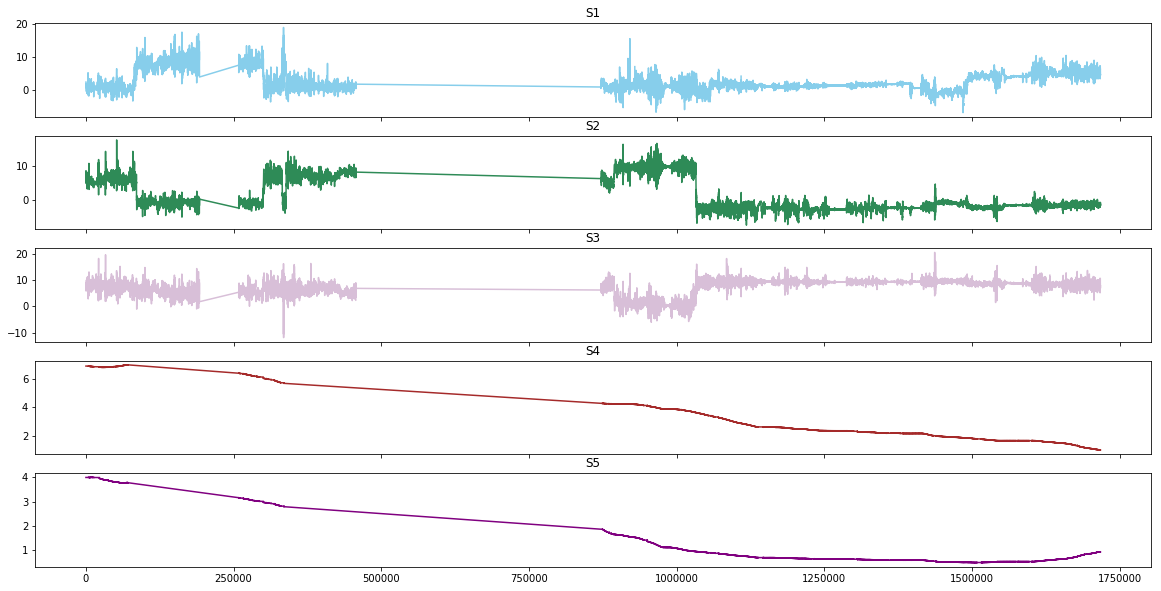

In [30]:
if (mode == 'Training'):
    plotdata(dataset,'DatathoanTraining')
else:
    plotdata(dataset,'DatathoanTest')

In [31]:
dataset[dataset['Event_val'].isna()].head()

,Time,S1,S2,S3,S4,S5,Event_val,ElapasedTime
1,0:09:54.368,1.958466,6.599808,6.539322,6.878428,3.988469,NaN,65.0
2,0:09:54.375,1.355133,7.016403,6.212509,6.878428,3.988469,NaN,72.0
3,0:09:54.379,1.328796,7.343216,6.048508,6.878428,3.988469,NaN,76.0
4,0:09:54.388,1.221054,8.217102,6.684174,6.878428,3.988469,NaN,85.0
5,0:09:54.413,1.075012,8.525955,7.188156,6.878428,3.988469,NaN,110.0


In [32]:
dataset['Event_val'] = dataset['Event_val'].fillna(-999)

In [33]:
def fillMissingData(df):
    df_copy = df.copy()
    MissingIndex = df_copy[df_copy['Event_val']>=0].index.values # >0
    for i in MissingIndex:
        previous = i-1
        current = i
        nextIndex = i+1
      
        while (df_copy.iloc[nextIndex].isnull()['S1']):
            nextIndex = nextIndex+1

            
        if (previous>=0):
            s1 = df_copy.iloc[previous]['S1'] + ((df_copy.iloc[nextIndex]['S1'] - df_copy.iloc[previous]['S1'])/(df_copy.iloc[nextIndex]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime']))*(df_copy.iloc[current]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime'])
            s2 = df_copy.iloc[previous]['S2'] + ((df_copy.iloc[nextIndex]['S2'] - df_copy.iloc[previous]['S2'])/(df_copy.iloc[nextIndex]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime']))*(df_copy.iloc[current]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime'])
            s3 = df_copy.iloc[previous]['S3'] + ((df_copy.iloc[nextIndex]['S3'] - df_copy.iloc[previous]['S3'])/(df_copy.iloc[nextIndex]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime']))*(df_copy.iloc[current]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime'])
            s4 = df_copy.iloc[previous]['S4'] + ((df_copy.iloc[nextIndex]['S4'] - df_copy.iloc[previous]['S4'])/(df_copy.iloc[nextIndex]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime']))*(df_copy.iloc[current]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime'])
            s5 = df_copy.iloc[previous]['S5'] + ((df_copy.iloc[nextIndex]['S5'] - df_copy.iloc[previous]['S5'])/(df_copy.iloc[nextIndex]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime']))*(df_copy.iloc[current]['ElapasedTime'] - df_copy.iloc[previous]['ElapasedTime'])

            df_copy.loc[current,'S1']= s1
            df_copy.loc[current,'S2']= s2
            df_copy.loc[current,'S3']= s3
            df_copy.loc[current,'S4']= s4
            df_copy.loc[current,'S5']= s5        
    return df_copy

In [34]:
#dataset[dataset['Event_val']>=0]
dataset.dtypes

Time             object
S1              float64
S2              float64
S3              float64
S4              float64
S5              float64
Event_val       float64
ElapasedTime    float64
dtype: object

In [35]:
dataset = fillMissingData(dataset)

In [36]:
dataset.head()

,Time,S1,S2,S3,S4,S5,Event_val,ElapasedTime
0,0:09:54.303,2.511536,6.195190,6.600372,6.878428,3.988469,0.0,0.0
1,0:09:54.368,1.958466,6.599808,6.539322,6.878428,3.988469,-999.0,65.0
2,0:09:54.375,1.355133,7.016403,6.212509,6.878428,3.988469,-999.0,72.0
3,0:09:54.379,1.328796,7.343216,6.048508,6.878428,3.988469,-999.0,76.0
4,0:09:54.388,1.221054,8.217102,6.684174,6.878428,3.988469,-999.0,85.0


In [37]:
dataset['S1'].isna().any(),dataset['S1'].notna().all()

(False, True)

In [38]:
dataset.shape

(63588, 8)

In [39]:
if (mode == 'Training'):
    dataset.to_csv('TrainingDataset.csv')
else:
    dataset.to_csv('TestDataset.csv')

In [40]:
#FinalDS = dataset[dataset['Event_val']!=-999].reset_index(drop=True)

In [41]:
if (mode == 'Training'):
    FinalTrngDS = dataset[dataset['Event_val']!=-999].reset_index(drop=True)
else:
    #FinalTestDS = FinalDS[FinalDS['Event_val']!=-999].reset_index(drop=True)
    FinalTestDS = dataset


In [42]:
FinalTrngDS.tail()

,Time,S1,S2,S3,S4,S5,Event_val,ElapasedTime
978,0:38:26.602,5.233952,-1.431107,7.408528,1.025671,0.917116,28.584000,1712299.0
979,0:38:27.691,4.249381,-1.156721,9.368759,1.017413,0.920567,31.104001,1713388.0
980,0:38:28.678,4.476321,-2.005435,9.619458,1.010383,0.923541,29.592001,1714375.0
981,0:38:29.576,4.575018,-1.615453,8.138397,1.003851,0.925565,28.872002,1715273.0
982,0:38:30.651,6.096842,-1.075211,7.128698,0.997355,0.929995,29.663999,1716348.0


# Build Model

In [43]:
# Correlation

In [44]:
corr = FinalTrngDS.loc[:,FinalTrngDS.columns !='ElapasedTime'].corr()
corr.style.background_gradient().set_precision(2)

,S1,S2,S3,S4,S5,Event_val
S1,1,-0.18,-0.061,-0.05,0.089,0.096
S2,-0.18,1,-0.82,0.63,0.54,0.28
S3,-0.061,-0.82,1,-0.44,-0.31,-0.28
S4,-0.05,0.63,-0.44,1,0.94,0.37
S5,0.089,0.54,-0.31,0.94,1,0.32
Event_val,0.096,0.28,-0.28,0.37,0.32,1


In [45]:
FinalTrngDS['Event_val'].head()

0     0.000000
1    12.276000
2     9.252000
3    12.276000
4    23.147999
Name: Event_val, dtype: float64

In [46]:
FinalTrngDS.columns

Index(['Time', 'S1', 'S2', 'S3', 'S4', 'S5', 'Event_val', 'ElapasedTime'], dtype='object')

In [47]:
y = FinalTrngDS.iloc[:,6].values # 'Event_val'
#y

In [48]:
#FeatuesPredictors = ['S1', 'S3', 'S4', 'S5'] # 'S2'
#FeatuesPredictors = ['S1', 'S2', 'S3', 'S4', 'S5']
#FeatuesPredictors = ['S1', 'S2', 'S4', 'S5'] # 'S3' # Best So far
#FeatuesPredictors = ['S2', 'S4', 'S5'] #'S1',  'S3'

#FeatuesPredictors = ['S1','S2', 'S4'] #'S1',  'S3'

FeatuesPredictors = ['S2','S4', 'S5'] #'S2'   ######BESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSTTTTTTTTTT

#FeatuesPredictors = ['S4','S5'] #'S5'

X=FinalTrngDS[FeatuesPredictors].values
X

array([[ 6.19519043,  6.8784279 ,  3.988469  ],
       [ 7.08083135,  6.87838518,  3.98847683],
       [ 3.3636049 ,  6.87010495,  3.98975564],
       ...,
       [-2.00543454,  1.01038331,  0.92354065],
       [-1.61545282,  1.00385092,  0.92556495],
       [-1.07521057,  0.9973554 ,  0.92999528]])

In [49]:
X.shape,y.shape

((983, 3), (983,))

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0)

# Fitting Multiple Linear regression to training set


In [51]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
regressor_mlr.intercept_,regressor_mlr.coef_

(7.522903140218286, array([ 0.16034485,  5.10562587, -2.80940363]))

In [53]:
y_pred_mlr = regressor_mlr.predict(X_test)

# Fitting Polynoinal regression to training set

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
regressor_linPoly = LinearRegression()
regressor_linPoly.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
#regressor_linPoly.intercept_,regressor_linPoly.coef_

In [56]:
y_pred_poly = regressor_linPoly.predict(poly_reg.fit_transform(X_test))

# Fitting Decision Tree regression to training set

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [58]:
y_pred_dt = regressor_dt.predict(X_test)

# Fitting Random Forest regression to training set

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=300, random_state=0)
regressor_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
y_pred_rf = regressor_rf.predict(X_test)

# Evaluate Model performance

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mlr),r2_score(y_test,y_pred_poly),r2_score(y_test,y_pred_dt),r2_score(y_test,y_pred_rf)

(0.12215890452961975,
 0.6214586253289226,
 0.9276480271239957,
 0.9570300572372749)

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_mlr),mean_squared_error(y_test,y_pred_poly),mean_squared_error(y_test,y_pred_dt),mean_squared_error(y_test,y_pred_rf)

(221.3312474155168, 95.44214219025594, 18.242199519081403, 10.834069038373276)

In [63]:
Actuals = y_test.reshape(len(y_test),1)

y_pred_mlr = y_pred_dt.reshape(len(y_pred_mlr),1)
y_pred_poly = y_pred_dt.reshape(len(y_pred_poly),1)

y_pred_dt = y_pred_dt.reshape(len(y_pred_dt),1)
y_pred_rf = y_pred_rf.reshape(len(y_pred_rf),1)

Columns = ['Actuals','MLR','Poly','DecisionTree','RandomForest']

FinalResult = pd.DataFrame(np.hstack((Actuals,y_pred_mlr,y_pred_poly,y_pred_dt,y_pred_rf)),columns = Columns)
#FinalResult = pd.DataFrame(Actuals)
FinalResult.head()

,Actuals,MLR,Poly,DecisionTree,RandomForest
0,56.880001,60.120003,60.120003,60.120003,52.647362
1,4.140000,6.588000,6.588000,6.588000,5.344920
2,17.675999,19.763999,19.763999,19.763999,15.376080
3,0.000000,4.896000,4.896000,4.896000,1.886760
4,31.932000,31.572002,31.572002,31.572002,30.392760


# ****************** Selected Model ****************
### - RandomForest for prediction

In [64]:
TestDataset_final = pd.read_csv('DatathonAI2018\data\TestDataset_final.csv').drop(columns ='Unnamed: 0' )
TestDataset_final.head()

,Time,S1,S2,S3,S4,S5,Event_val,ElapasedTime
0,38:31.7,4.121874,-0.708732,7.278171,0.990715,0.934132,1000,0
1,38:31.7,4.382599,-0.785110,7.696915,0.990644,0.934168,-999,11
2,38:31.7,4.856644,-0.923981,8.458267,0.990514,0.934234,-999,31
3,38:31.8,4.486740,-1.374084,7.609528,0.990319,0.934332,-999,61
4,38:31.8,5.060165,-1.381271,7.668182,0.990163,0.934411,-999,85


In [65]:
TestDataset_final.shape

(2063, 8)

In [66]:
TestDataset = TestDataset_final[TestDataset_final['Event_val']>0].reset_index(drop=True)
TestDataset.shape

(40, 8)

In [67]:
FeatuesPredictors

['S2', 'S4', 'S5']

In [68]:
#FeatuesPredictors = ['S2','S4', 'S5']

X_test_Final=TestDataset[FeatuesPredictors].values
#X_test_Final

In [69]:
y_pred_rf_final = regressor_rf.predict(X_test_Final)

In [70]:
y_pred_rf_final

array([29.34083952, 29.48987973, 29.56991951, 30.00660067, 29.56235966,
       28.8645596 , 29.56463974, 29.5683598 , 29.91708074, 28.77875959,
       29.48640022, 29.5066799 , 29.2164005 , 29.91708074, 29.55660103,
       29.5477197 , 29.56463974, 29.5477197 , 29.61792099, 29.5465197 ,
       29.57723966, 29.55479965, 29.55875965, 29.57507966, 29.55875965,
       29.55479965, 29.55479965, 29.56235966, 29.58995972, 29.57303977,
       29.56235966, 29.5957196 , 29.58720084, 29.00519958, 29.22251962,
       29.20919962, 29.19419962, 29.22251962, 29.4964799 , 29.17139963])

In [71]:
#FinalPrediction = y_pred.reshape(len(y_pred),1)

Columns = ['Event_val']

FinalPrediction = pd.DataFrame(np.hstack((y_pred_rf_final)),columns = Columns)

FinalPrediction.head()

,Event_val
0,29.340840
1,29.489880
2,29.569920
3,30.006601
4,29.562360


In [72]:
TestFile = pd.read_csv('DatathonAI2018\data\DatathoanAIEventdataTest.csv').drop(columns = ['Event_val','Unnamed: 2'])
TestFile.head()

,Time
0,0:38:31.692
1,0:38:32.657
2,0:38:33.672
3,0:38:34.732
4,0:38:35.606


In [73]:
CaseStudy1_result = pd.concat([TestFile,FinalPrediction],axis=1)

In [74]:
CaseStudy1_result.head()

,Time,Event_val
0,0:38:31.692,29.340840
1,0:38:32.657,29.489880
2,0:38:33.672,29.569920
3,0:38:34.732,30.006601
4,0:38:35.606,29.562360


In [75]:
CaseStudy1_result.to_csv('DatathonAI2018\data\CaseStudy1_result.csv',index=False)

In [76]:
# *****************************************************************************************